<a href="https://colab.research.google.com/github/IT-17005/Transfer-Learning/blob/master/Schizo_ResNet50_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__ 

'2.8.0'

In [36]:
# Import The Libraries 

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive .mount('/content/drive/') 

Mounted at /content/drive/


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path="/content/drive/MyDrive/dataset/data/train"
valid_path="/content/drive/MyDrive/dataset/data/validation"

In [8]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE + [3], 
    weights = 'imagenet',
    pooling='avg',classes=2, 
    include_top = False  
)

# ResNet50(include_top=False,
#                    input_shape=(224,224,3),
#                    pooling='avg',classes=2,
#                    weights='imagenet')

In [9]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [10]:
# This will let us use the default weights used by the imagenet.  
for layer in resnet.layers:
    layer.trainable = False

In [11]:
# Set the flatten layer.
x = Flatten() (resnet.output)

In [12]:
prediction = Dense(2, activation = 'softmax')(x)

In [50]:
# Create a model Object
# import tensorflow as tf
# from tensorflow.keras.models import Model
model = Model(inputs = resnet.input, outputs = prediction)

In [51]:
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [44]:
# model.compile(
#     optimizer = Adam(lr=0.001),
#     loss = 'categorical_crossentropy',
#     metrics = ['accuracy']
# )

In [52]:
# Use the Image Data Generator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [53]:
training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = IMAGE_SIZE,
    batch_size = 16,
    class_mode = 'binary' # As we have more than 2 so using categorical.. for 2 we might have used binary.
)

Found 282 images belonging to 2 classes.


In [54]:
test_set = train_datagen.flow_from_directory(
    valid_path,
    target_size = IMAGE_SIZE,
    batch_size = 16,
    class_mode = 'binary'
)

Found 95 images belonging to 2 classes.


In [55]:
# model.compile (
#     loss = 'categorical_crossentropy',
#     optimizer = 'adam',
#     metrics = ['accuracy']
# )
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [56]:
# Fit the model.
hist = model.fit(training_set, validation_data = test_set, steps_per_epoch = 10, epochs = 5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 68s 7s/step - loss: 0.7312 - accuracy: 0.5519 - val_loss: 0.9192 - val_accuracy: 0.3263
Epoch 2/5
10/10 [==============================] - 43s 4s/step - loss: 0.6931 - accuracy: 0.5312 - val_loss: 0.6156 - val_accuracy: 0.6737
Epoch 3/5
10/10 [==============================] - 42s 4s/step - loss: 0.6526 - accuracy: 0.6169 - val_loss: 0.7111 - val_accuracy: 0.5158
Epoch 4/5
10/10 [==============================] - 42s 4s/step - loss: 0.6163 - accuracy: 0.7857 - val_loss: 0.6302 - val_accuracy: 0.5895
Epoch 5/5
10/10 [==============================] - 45s 5s/step - loss: 0.6132 - accuracy: 0.7312 - val_loss: 0.6667 - val_accuracy: 0.6000


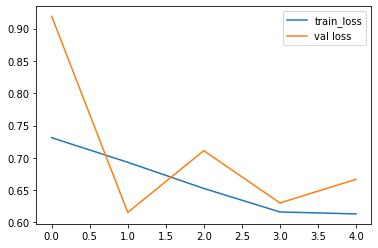

In [58]:
# Plot the Loss
plt.plot(hist.history['loss'], label = 'train_loss')
plt.plot(hist.history['val_loss'], label ='val loss')
plt.legend()
plt.show()
# plt.savefig('LossVal_loss')

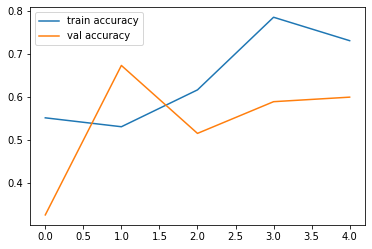

In [60]:
# Plot the Accuracy
plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label ='val accuracy')
plt.legend()
plt.show()
# plt.savefig('valAccuracy')